<a href="https://colab.research.google.com/github/karrin10/homework1/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kathleen Arrington

> Homework 1

> ECGR 4105





# **Problem 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import data set from personal GitHub
url = 'https://raw.githubusercontent.com/karrin10/homework1/main/D3.csv?token=GHSAT0AAAAAACHRUB3HYREA7N5GE6AL3RRKZICO5HA'
df = pd.read_csv(url)

#Display first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
#Separate features and labels
x1 = df.values[:, 0]
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3]

#Number of training examples
m = len(y)

#Display the first 5 recors and the total number of training examples
print ('X1 =', x1[: 5])
print ('X2 =', x2[: 5])
print ('X3 =', x3[: 5])
print ('Y =', y[: 5])
print ('k =', m)

X1 = [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 = [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 = [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
k = 100


In [ ]:
#Different ways to display dataset
from IPython.display import display
display(df)


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [ ]:
#Create a column vector of ones
x_0 = np.ones((m, 1))

#Reshape features (x) to make them 2D arrays, to fit matrix
x_1 = x1.reshape(m, 1)
x_2 = x2.reshape(m, 1)
x_3 = x3.reshape(m, 1)

#Stacks columns horizontally
x_1_data = np.hstack((x_0, x_1))
x_2_data = np.hstack((x_0, x_2))
x_3_data = np.hstack((x_0, x_3))

#Initialize iterations and alpha
iter_1 = 1500
alp_1 = 0.01
alp_2 = 0.05
alp_3 = 0.1

In [ ]:
#Compute cost for linear regression
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
#Compute the optimal parameters using gradient descent for linear regression
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [ ]:
#Calculate theta and cost history values for each variable (and each alpha)
##X0 and X1
theta = np.zeros(2)
theta1_1, cost_history_1_1 = gradient_descent(x_1_data, y, theta, alp_1, iter_1)

theta = np.zeros(2)
theta1_2, cost_history_1_2 = gradient_descent(x_1_data, y, theta, alp_2, iter_1)

theta = np.zeros(2)
theta1_3, cost_history_1_3 = gradient_descent(x_1_data, y, theta, alp_3, iter_1)

In [ ]:
##X0 and X2
theta = np.zeros(2)
theta2_1, cost_history_2_1 = gradient_descent(x_2_data, y, theta, alp_1, iter_1)

theta = np.zeros(2)
theta2_2, cost_history_2_2 = gradient_descent(x_2_data, y, theta, alp_2, iter_1)

theta = np.zeros(2)
theta2_3, cost_history_2_3 = gradient_descent(x_2_data, y, theta, alp_3, iter_1)

In [ ]:
##X0 and X3
theta = np.zeros(2)
theta3_1, cost_history_3_1 = gradient_descent(x_3_data, y, theta, alp_1, iter_1)

theta = np.zeros(2)
theta3_2, cost_history_3_2 = gradient_descent(x_3_data, y, theta, alp_2, iter_1)

theta = np.zeros(2)
theta3_3, cost_history_3_3 = gradient_descent(x_3_data, y, theta, alp_3, iter_1)

Linear Regression Plot for X1

Text(0, 0.5, 'Output')

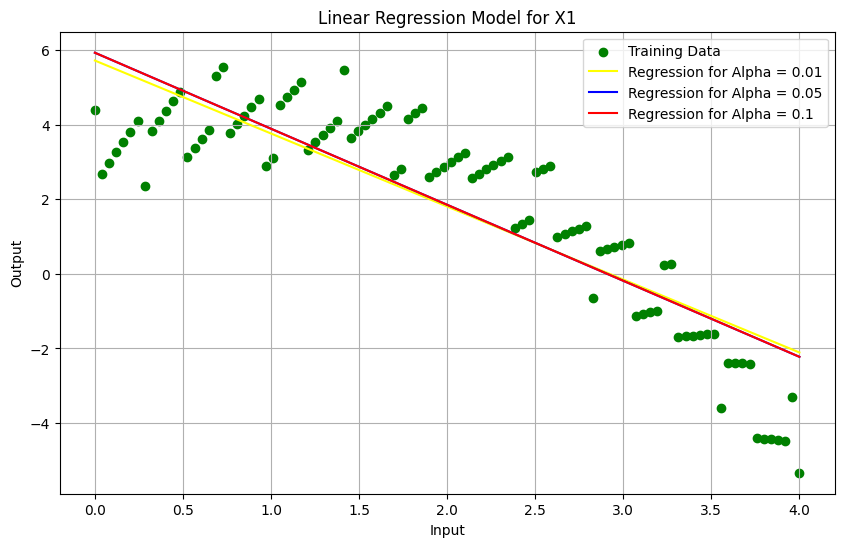

In [ ]:
plt.scatter(x_1_data[:, 1], y, color='green', marker='o', label='Training Data')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_1), color='yellow', label='Regression for Alpha = 0.01')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_2), color='blue', label='Regression for Alpha = 0.05')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_3), color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X1')
plt.xlabel('Input')
plt.ylabel('Output')

Gradient Descent Plot for X1

Text(0, 0.5, 'Loss')

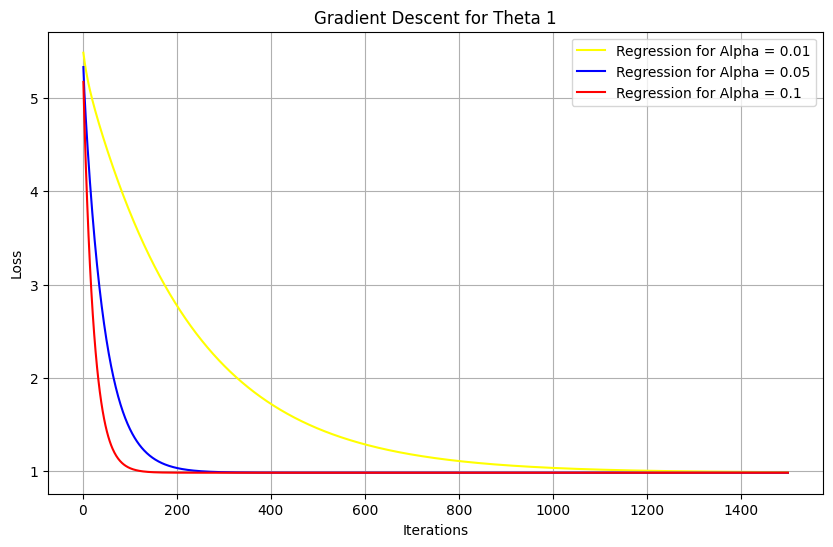

In [ ]:
plt.plot(range(1, iter_1 + 1), cost_history_1_1, color='yellow', label='Regression for Alpha = 0.01')
plt.plot(range(1, iter_1 + 1), cost_history_1_2, color='blue', label='Regression for Alpha = 0.05')
plt.plot(range(1, iter_1 + 1), cost_history_1_3, color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 1')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Linear Regression Plot for X2

Text(0, 0.5, 'Output')

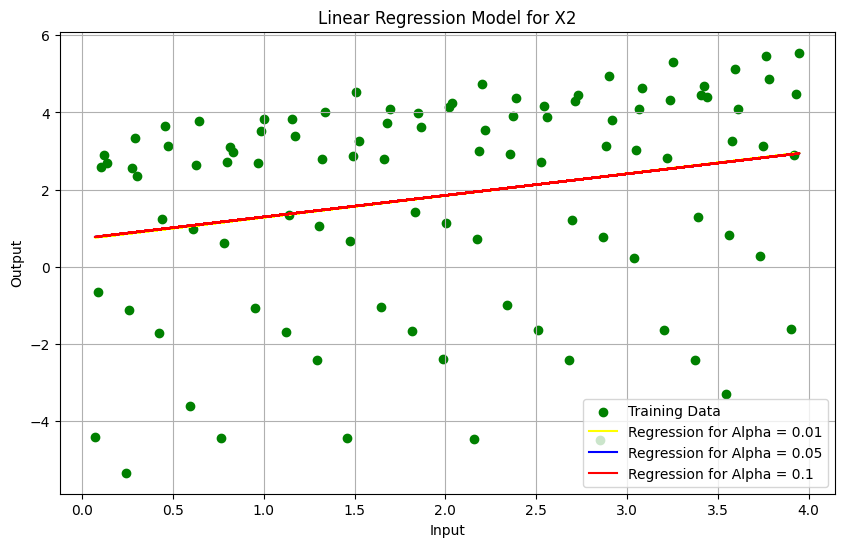

In [ ]:
plt.scatter(x_2_data[:, 1], y, color='green', marker='o', label='Training Data')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_1), color='yellow', label='Regression for Alpha = 0.01')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_2), color='blue', label='Regression for Alpha = 0.05')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_3), color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X2')
plt.xlabel('Input')
plt.ylabel('Output')

Gradient Descent Plot for X2

Text(0, 0.5, 'Loss')

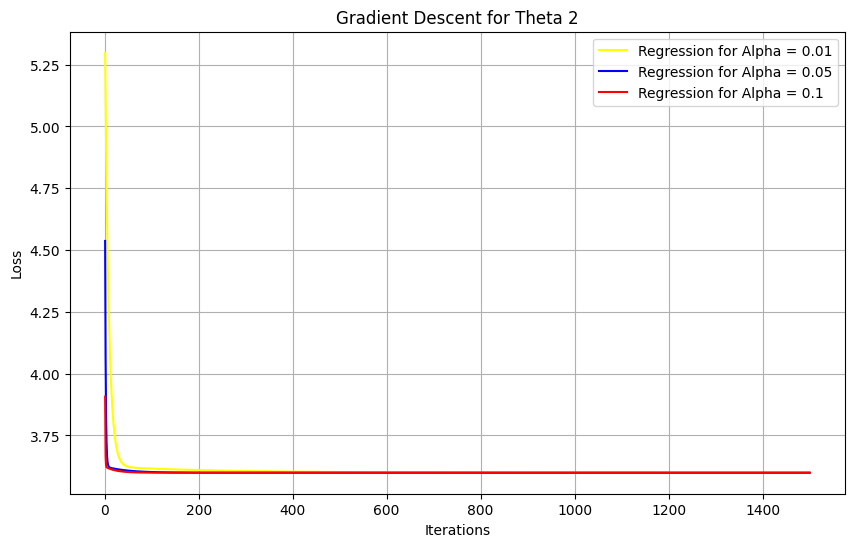

In [ ]:
plt.plot(range(1, iter_1 + 1), cost_history_2_1, color='yellow', label='Regression for Alpha = 0.01')
plt.plot(range(1, iter_1 + 1), cost_history_2_2, color='blue', label='Regression for Alpha = 0.05')
plt.plot(range(1, iter_1 + 1), cost_history_2_3, color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Linear Regression Plot for X3

Text(0, 0.5, 'Output')

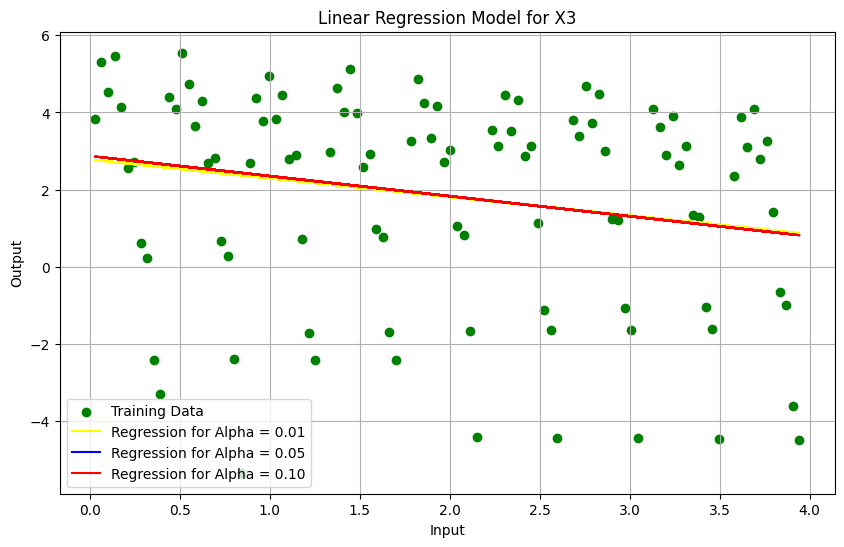

In [ ]:
plt.scatter(x_3_data[:, 1], y, color='green', marker='o', label='Training Data')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_1), color='yellow', label='Regression for Alpha = 0.01')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_2), color='blue', label='Regression for Alpha = 0.05')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_3), color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X3')
plt.xlabel('Input')
plt.ylabel('Output')

Gradient Descent Plot for X3

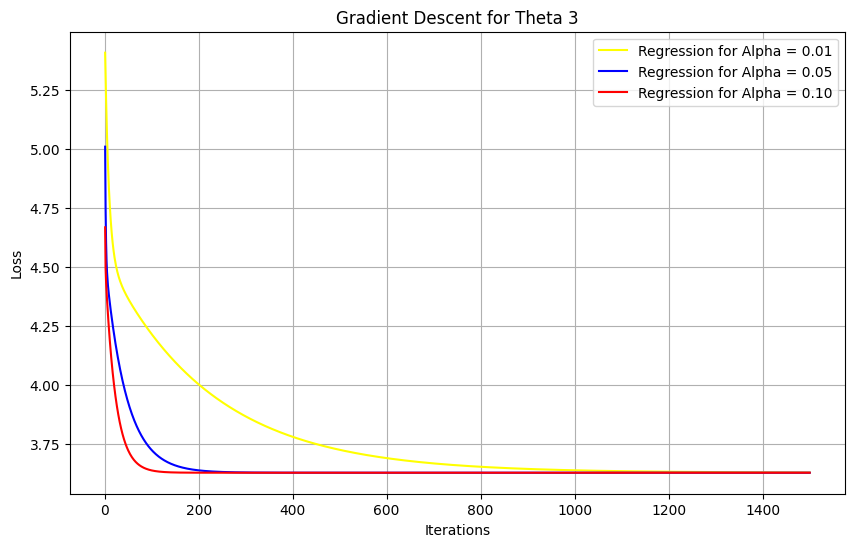

In [ ]:
plt.plot(range(1, iter_1 + 1), cost_history_3_1, color='yellow', label='Regression for Alpha = 0.01')
plt.plot(range(1, iter_1 + 1), cost_history_3_2, color='blue', label='Regression for Alpha = 0.05')
plt.plot(range(1, iter_1 + 1), cost_history_3_3, color='red', label='Regression for Alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

# **Problem 2**

In [ ]:
# Cost for alpha (0.01)
x1_1_cost = cost_history_1_1[-1]
x2_1_cost = cost_history_2_1[-1]
x3_1_cost = cost_history_3_1[-1]

# Cost for alpha (0.05)
x1_2_cost = cost_history_1_2[-1]
x2_2_cost = cost_history_2_2[-1]
x3_2_cost = cost_history_3_2[-1]

# Cost for alpha (0.1)
x1_3_cost = cost_history_1_3[-1]
x2_3_cost = cost_history_2_3[-1]
x3_3_cost = cost_history_3_3[-1]

print("Costs for alpha (0.01)")
print("X1: ", x1_1_cost)
print("X2: ", x2_1_cost)
print("X3: ", x3_1_cost)

print("\nCosts for alpha (0.05)")
print("X1: ", x1_2_cost)
print("X2: ", x2_2_cost)
print("X3: ", x3_2_cost)

print("\nCosts for alpha (0.10)")
print("X1: ", x1_3_cost)
print("X2: ", x2_3_cost)
print("X3: ", x3_3_cost)

Costs for alpha (0.01)
X1:  0.9905894438682062
X2:  3.5993993982305357
X3:  3.6305262475389664

Costs for alpha (0.05)
X1:  0.9849930825406077
X2:  3.5993660181680425
X3:  3.629451124607917

Costs for alpha (0.10)
X1:  0.9849930825405946
X2:  3.599366018168041
X3:  3.6294511246079155


In [ ]:
#Stacks columns horizontally
total_data = np.hstack((x_0, x_1, x_2, x_3))

#Initialize iterations and alpha
iter_2 = 1500
alpha_2_1 = 0.01
alpha_2_2 = 0.05
alpha_2_3 = 0.1

In [ ]:
#Calculate theta and cost history (all 3 alpha values)
theta = np.zeros(4)
total_theta_1, total_cost_history_1 = gradient_descent(total_data, y, theta, alpha_2_1, iter_2)

theta = np.zeros(4)
total_theta_2, total_cost_history_2 = gradient_descent(total_data, y, theta, alpha_2_2, iter_2)

theta = np.zeros(4)
total_theta_3, total_cost_history_3 = gradient_descent(total_data, y, theta, alpha_2_3, iter_2)


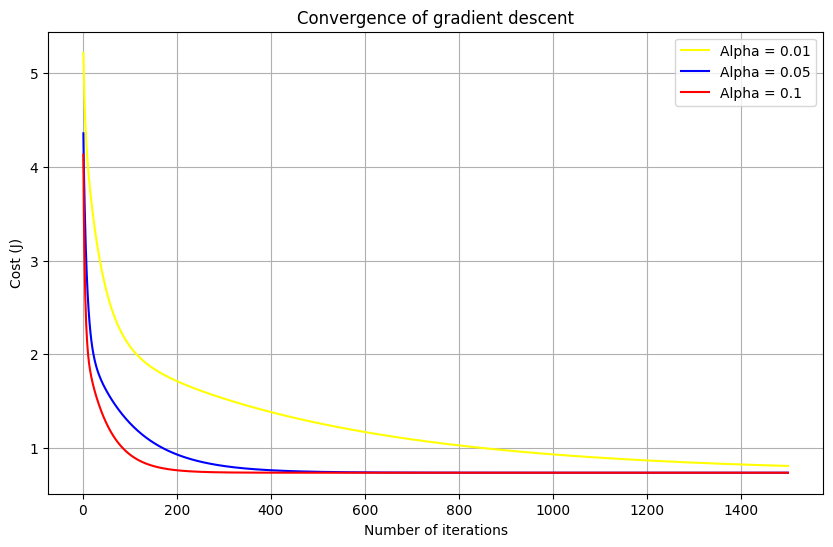

In [ ]:
plt.plot(range(1, iter_2 + 1), total_cost_history_1, color='yellow', label = 'Alpha = 0.01')
plt.plot(range(1, iter_2 + 1), total_cost_history_2, color='blue', label = 'Alpha = 0.05')
plt.plot(range(1, iter_2 + 1), total_cost_history_3, color='red', label = 'Alpha = 0.1')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')

plt.show()

In [ ]:
def predict_value(x_in, theta_in):
    y = theta_in[0]
    for x_val, theta_val in zip(x_in, theta_in[1:]):
      y += x_val * theta_val

    return y

In [ ]:
#Cost for alpha = 0.01
total_cost_1 = total_cost_history_1[-1]
total_cost_2 = total_cost_history_2[-1]
total_cost_3 = total_cost_history_3[-1]

print("Cost for alpha (0.01): ", total_cost_1)
print("Cost for alpha (0.05): ", total_cost_2)
print("Cost for alpha (0.1): ", total_cost_3)


Cost for alpha (0.01):  0.8105104429083866
Cost for alpha (0.05):  0.7384646851794184
Cost for alpha (0.1):  0.7384642415684215


In [ ]:
#Initialize the values
values_1 = [1,1,1]
values_2 = [2,0,4]
values_3 = [3,2,1]

#Prediction of the values
y1 = predict_value(values_1, total_theta_2)
y2 = predict_value(values_2, total_theta_2)
y3 = predict_value(values_3, total_theta_2)

print(total_theta_2)

print("The predicted value for the first set of x values: ", y1)
print("The predicted value for the first set of x values: ", y2)
print("The predicted value for the first set of x values: ", y3)

[ 5.31128136 -2.0033116   0.5330402  -0.26517886]
The predicted value for the first set of x values:  3.5758310955346353
The predicted value for the first set of x values:  0.24394270393310014
The predicted value for the first set of x values:  0.10224809362461512
